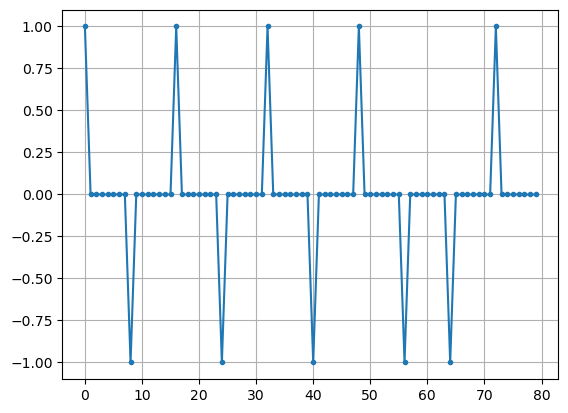

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

cant_simbolos = 10
sps = 8 # sample per symbol

bits = np.random.randint(0, 2, cant_simbolos) # Our data to be transmitted, 1's and 0's

x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal
    
plt.figure(0)
plt.plot(x, '.-')
plt.grid(True)
plt.show()

### Referencias

- [1]: https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_fase
